**The marketing campaigns were based on phone calls and emails.
So the company doing the marketing here is a bank or banking
institution, and what they were trying to do was to measure
and predict the enrolment of clients in one of their products
called term deposit.**

<h2 align="center">Automatic Machine Learning with H2O AutoML</h2>

### Importing Packages

In [24]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

### Loading and Exploring the Data

In [28]:
xls = pd.ExcelFile(r'C:/Users/gotec/Desktop/6 th sem/ai ml/mini  project of ai ml/bank_term_deposit_marketing_analysis.xlsx',engine='openpyxl')

In [29]:
xls.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [35]:
client_info = pd.read_excel(xls, 'CLIENT_INFO')
loan_history = pd.read_excel(xls, 'LOAN_HISTORY')
marketing_history=pd.read_excel(xls, 'MARKETING HISTORY')
subscription_history=pd.read_excel(xls, 'SUBSCRIPTION HISTORY')

In [36]:
client_info.head()

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


In [37]:
loan_history.head()

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143,yes,no
1,2837,no,29,yes,no
2,2838,no,2,yes,yes
3,2839,no,1506,yes,no
4,2840,no,1,no,no


In [38]:
marketing_history.head()

,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5,may,261,1,-1,0,unknown
1,2837,unknown,5,may,151,1,-1,0,unknown
2,2838,unknown,5,may,76,1,-1,0,unknown
3,2839,unknown,5,may,92,1,-1,0,unknown
4,2840,unknown,5,may,198,1,-1,0,unknown


In [39]:
subscription_history.head()

,ID,TERM_DEPOSIT
0,2836,no
1,2837,no
2,2838,no
3,2839,no
4,2840,no


In [43]:
df = pd.merge(client_info,loan_history, on=['ID'])
df = pd.merge(df,marketing_history, on=['ID'])
df = pd.merge(df,subscription_history, on=['ID'])
df.head()


,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [45]:
df = df.drop(['ID'], axis=1)

### Data Prep & Start H2O

In [53]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,9 mins 11 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,"14 days, 20 hours and 29 minutes"
H2O_cluster_name:,H2O_from_python_gotec_491vpk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,48.83 Mb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [54]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [55]:
h2o_df.describe()

Rows:45211
Cols:17

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432809,,,,,1362.272057685082,,,,15.806418791886935,,258.1630797814693,2.7638406582468984,40.1978279622216,0.5803233726305563,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.61876204097539,,,,,3044.7658291685234,,,,8.32247615304459,,257.5278122651711,3.0980208832791796,100.1287459905981,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [ ]:
#df[y]=df.[y].asfactor()


In [60]:
train, test = h2o_df.split_frame(ratios=[.75])

x=train.columns
y='TERM_DEPOSIT'
x.remove(y)

### Run H2O AutoML

In [62]:
from h2o.automl import H2OAutoML


In [64]:
df.TERM_DEPOSIT.value_counts()

TERM_DEPOSIT
no     39922
yes     5289
Name: count, dtype: int64

In [67]:
aml = H2OAutoML(max_runtime_secs=600,
                balance_classes=True,
                stopping_metric='logloss',
                project_name='Final',
                seed=1)
%time aml.train(x=x , y=y, training_frame=train)

AutoML progress: |█
12:46:51.123: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
CPU times: total: 1.61 s
Wall time: 10min 56s


key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/9
# GBM base models (used / total),4/5
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
# DeepLearning base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


### AutoML Leaderboard and Ensemble Exploration

In [74]:
lb =  aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_2_AutoML_1_20240328_124651,0.935638,0.195024,0.62944,0.16865,0.24792,0.0614641
StackedEnsemble_AllModels_1_AutoML_1_20240328_124651,0.935429,0.195305,0.629104,0.162664,0.247929,0.061469
StackedEnsemble_BestOfFamily_3_AutoML_1_20240328_124651,0.934595,0.196349,0.624997,0.17152,0.248795,0.0618988
StackedEnsemble_BestOfFamily_2_AutoML_1_20240328_124651,0.934322,0.196802,0.62519,0.169476,0.248878,0.06194
StackedEnsemble_BestOfFamily_1_AutoML_1_20240328_124651,0.934082,0.198167,0.620679,0.179287,0.249566,0.0622833
GBM_1_AutoML_1_20240328_124651,0.933978,0.205998,0.621746,0.180123,0.255108,0.0650802
GBM_2_AutoML_1_20240328_124651,0.933778,0.202908,0.620411,0.16979,0.252861,0.0639389
GBM_5_AutoML_1_20240328_124651,0.932694,0.202542,0.618111,0.173337,0.252764,0.0638897
GBM_4_AutoML_1_20240328_124651,0.931544,0.21715,0.617142,0.170755,0.261129,0.0681886
GBM_3_AutoML_1_20240328_124651,0.931355,0.208213,0.608344,0.167519,0.256245,0.0656613


In [75]:
se = aml.leader
metalearner = h2o.get_model(se.metalearner().model_id)

In [76]:
metalearner.varimp()

[('GBM_1_AutoML_1_20240328_124651',
  0.7489503026008606,
  1.0,
  0.2841839198341455),
 ('DRF_1_AutoML_1_20240328_124651',
  0.6291859745979309,
  0.8400904204364066,
  0.23874018869473337),
 ('GBM_2_AutoML_1_20240328_124651',
  0.4936862587928772,
  0.6591709183886642,
  0.1873257754283642),
 ('GBM_5_AutoML_1_20240328_124651',
  0.41160935163497925,
  0.5495816614341351,
  0.15618227081531477),
 ('XRT_1_AutoML_1_20240328_124651',
  0.185391366481781,
  0.2475349376827503,
  0.07034544888658491),
 ('GBM_4_AutoML_1_20240328_124651',
  0.1666189730167389,
  0.2224699989280002,
  0.06322239634085725),
 ('GBM_3_AutoML_1_20240328_124651', 0.0, 0.0, 0.0),
 ('GLM_1_AutoML_1_20240328_124651', 0.0, 0.0, 0.0),
 ('DeepLearning_1_AutoML_1_20240328_124651', 0.0, 0.0, 0.0)]

### Base Learner GBM_1 Model Exploration

In [77]:
model = h2o.get_model('GBM_1_AutoML_1_20240328_124651')

In [78]:
model.model_performance(test)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.0648811571841862
RMSE: 0.2547177991114602
LogLoss: 0.2054991446421555
Mean Per-Class Error: 0.18285563742504202
AUC: 0.9341629007632168
AUCPR: 0.6182312186416963
Gini: 0.8683258015264337

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2330637933506072
       no    yes    Error    Rate
-----  ----  -----  -------  ----------------
no     9216  702    0.0708   (702.0/9918.0)
yes    384   918    0.2949   (384.0/1302.0)
Total  9600  1620   0.0968   (1086.0/11220.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.233064     0.628337  227
max f2                       0.0738613    0.737904  312
max f0point5                 0.333205     0.605385  180
max accuracy                 0.333205     0.908734  180
max precision                0.882766     1         0
max recall                   0.00177641   1         397
max specificity              0.882766     1         0
max absolute_mcc             0.194319     0.578022  246
max min_per_class_accuracy   0.0874024    0.864055  302
max mean_per_class_accuracy  0.0498893    0.87128   331
max tns                      0.882766     9918      0
max fns                      0.882766     1301      0
max fps                      0.00109063   9918      399
max tps                      0.00177641   1302      397
max tnr                      0.882766     1         0
max fnr                      0.882766     0.999232  0
max fpr                      0.00109063   1         399
max tpr                      0.00177641   1         397

Gains/Lift Table: Avg response rate: 11.60 %, avg score:  8.63 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100713                   0.715329           6.93977     6.93977            0.80531          0.769244    0.80531                     0.769244            0.0698925       0.0698925                  593.977   593.977            0.0676743
2        0.0200535                   0.648811           6.61702     6.77911            0.767857         0.680799    0.786667                    0.725218            0.0660522       0.135945                   561.702   577.911            0.131105
3        0.0300357                   0.590451           5.8476      6.46953            0.678571         0.619946    0.750742                    0.690231            0.0583717       0.194316                   484.76    546.953            0.185847
4        0.0400178                   0.549241           5.46289     6.21843            0.633929         0.568838    0.721604                    0.65995             0.0545315       0.248848                   446.289   521.843            0.236245
5        0.05                        0.513483           5.46289     6.06759            0.633929         0.531671    0.7041                      0.63434             0.0545315       0.303379                   446.289   506.759            0.286642
6        0.1                         0.349229           4.63902     5.3533             0.538324         0.424663    0.621212                    0.529502            0.231951        0.53533                    363.902   435.33             0.492479
7        0.15                        0.218593           3.59447     4.76703            0.417112         0.280892    0.553179                    0.446632            0.179724        0.715054                   259.447   376.703            0.6

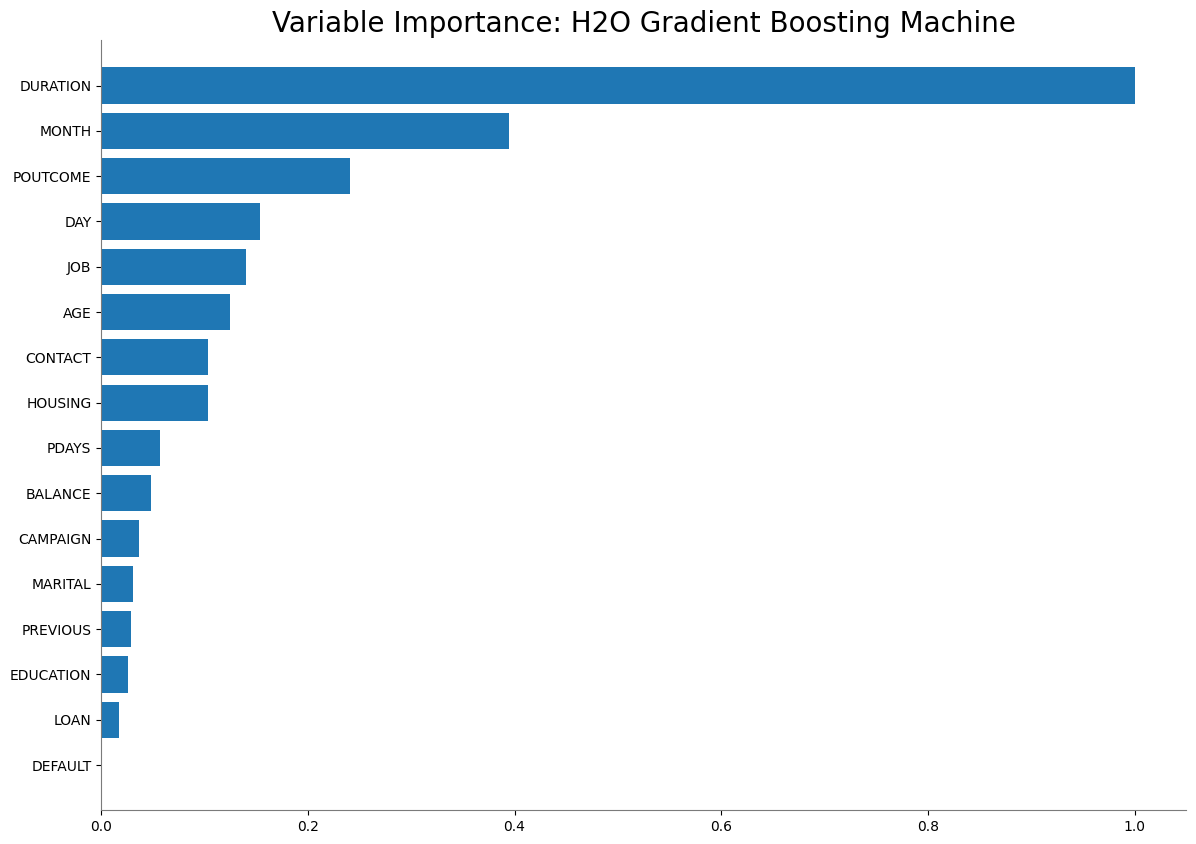

<Figure size 640x480 with 0 Axes>

In [81]:
model.varimp_plot(num_of_features=20)